In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from netCDF4 import Dataset

import utils as utl

In [2]:
Nh = 96
Nt = 37
sspacing = 3
tspacing = 4

HTLS_sknots = np.arange(0,Nh,sspacing)
HTHS_sknots = np.arange(0,Nh,1)
LTHS_tknots = np.arange(0,Nh,tspacing)
Nl = len(HTLS_sknots)
Ns = len(LTHS_tknots)

Do = Nh*Nh
Di = Nl*Nl

N = Nt*Ns

[]

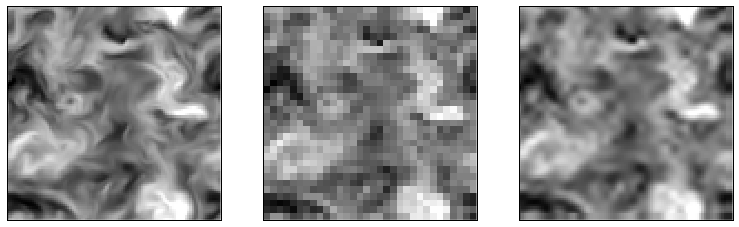

In [3]:
ncfile1 = Dataset('/data/ISOTROPIC/data/data_downsampled4.nc','r')
xh = np.array(ncfile1.variables['velocity_x'][0,0:Nh,0:Nh,0])
ncfile1.close()
xl = xh[0:-1:sspacing,0:-1:sspacing]
xinterp = utl.interp2(HTLS_sknots, HTLS_sknots, xl, HTHS_sknots, HTHS_sknots)

fig = plt.figure(figsize=(13, 5))

ax = plt.subplot(1,3, 1)
cax = plt.imshow(xh, interpolation='none',clim=[-3,3],cmap='gray')
ax.set_xticks(())
ax.set_yticks(())
    
ax = plt.subplot(1,3, 2)
cax = plt.imshow(xl, interpolation='none',clim=[-3,3],cmap='gray')
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1,3, 3)
cax = plt.imshow(xinterp, interpolation='none',clim=[-3,3],cmap='gray')
ax.set_xticks(())
ax.set_yticks(())

# fig.colorbar(cax, ticks=[-3, -2, -1, 0, 1, 2, 3])

In [5]:
Xo_tr = np.zeros((N, Do))
Xi_tr = np.zeros((N, Di))
ncfile1 = Dataset('/data/ISOTROPIC/data/data_downsampled4.nc','r')
for t in range(Nt):
    count = 0
    for i in LTHS_tknots:
        xh = np.array(ncfile1.variables['velocity_x'][t,0:Nh,0:Nh,i])
        xl = xh[0:-1:sspacing,0:-1:sspacing] # xh[np.meshgrid(HTLS_sknots,HTLS_sknots)]
        Xo_tr[t*Ns + count,:] = np.reshape(xh,(1, Do))
        Xi_tr[t*Ns + count,:] = np.reshape(xl,(1, Di))
        count = count + 1
ncfile1.close()

# normalized: centered, variance 1
mea_i = np.zeros(Di)
sig_i = np.zeros(Di)
for k in range(Di):
    mea_i[k] = np.mean(Xi_tr[:,k])
    sig_i[k] = np.std(Xi_tr[:,k])
    Xi_tr[:,k] = (Xi_tr[:,k]-mea_i[k])/sig_i[k] 
    
mea_o = np.zeros(Do)
sig_o = np.zeros(Do)
for k in range(Do):
    mea_o[k] = np.mean(Xo_tr[:,k])
    sig_o[k] = np.std(Xo_tr[:,k])
    Xo_tr[:,k] = (Xo_tr[:,k]-mea_o[k])/sig_o[k] 

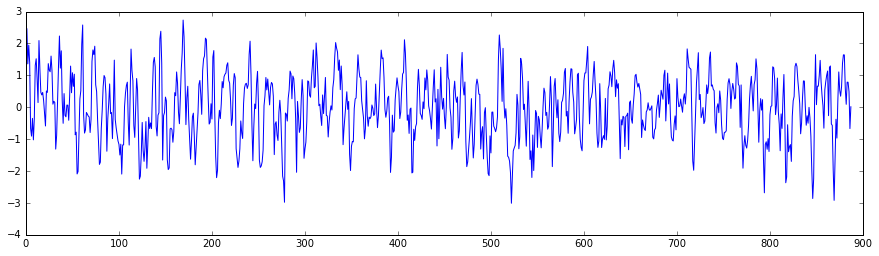

In [6]:
fig = plt.figure(figsize=(15, 4))
ax=plt.plot(Xi_tr[:,1])

In [39]:
from sklearn.kernel_ridge import KernelRidge
estimator = KernelRidge(kernel='poly', alpha=0.0, degree=2)
estimator.fit(Xi_tr, Xo_tr)

KernelRidge(alpha=0.0, coef0=1, degree=2, gamma=None, kernel='poly',
      kernel_params=None)

In [53]:
t=0
i=2

ncfile1 = Dataset('/data/ISOTROPIC/data/data_downsampled4.nc','r')
xh = np.array(ncfile1.variables['velocity_x'][t,0:Nh,0:Nh,i])
ncfile1.close()

xl = xh[0:-1:sspacing,0:-1:sspacing]
xinterp = utl.interp2(HTLS_sknots, HTLS_sknots, xl, HTHS_sknots, HTHS_sknots)

xl = np.divide(np.reshape(xl,(1, Nl*Nl)) - mea_i, sig_i)
xrec = estimator.predict(xl)
xrec = np.multiply(xrec, sig_o) + mea_o

xrec = np.reshape(xrec, (Nh,Nh))
xl = np.reshape(xl, (Nl,Nl))

0.762304086171


[]

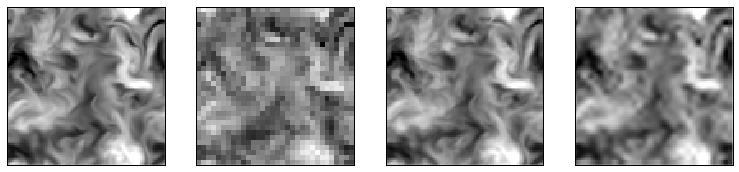

In [54]:
NRMSE_RR = utl.NRMSE(xh,xrec)
NRMSE_interp = utl.NRMSE(xh,xinterp)
print NRMSE_RR/NRMSE_interp

fig = plt.figure(figsize=(13, 5))

ax = plt.subplot(1,4, 1)
cax = plt.imshow(xh, interpolation='none',clim=[-3,3],cmap='gray')
ax.set_xticks(())
ax.set_yticks(())
    
ax = plt.subplot(1,4, 2)
cax = plt.imshow(xl, interpolation='none',clim=[-3,3],cmap='gray')
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1,4, 3)
cax = plt.imshow(xrec, interpolation='none',clim=[-3,3],cmap='gray')
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1,4, 4)
cax = plt.imshow(xinterp, interpolation='none',clim=[-3,3],cmap='gray')
ax.set_xticks(())
ax.set_yticks(())

###### 

In [55]:
print np.linspace(1, 10, 10)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
